In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

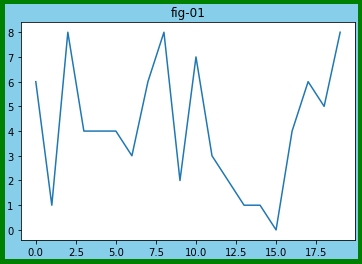

In [3]:
"""基本的なプロット
figsize     ：Figureのサイズ。横縦を(float, float)で指定。
dpi         ：整数で指定。Figureのピクセルサイズ=figsize×dpi
facecolor   ：図の背景色。Jupyterだと透過色になってたりする。
linewidth   ：図の外枠の太さ。デフォルトは0（枠なし）。
edgecolor   ：図の枠の色。linewidthを指定しないと意味ない。
subplotpars ：AxesSubplotの基準を指定する。
tight_layout：Trueにするとオブジェクトの配置が自動調整される。
"""
fig = plt.figure(figsize=(6, 4), dpi=72,
                 facecolor='skyblue', linewidth=10, edgecolor='green')
ax = fig.add_subplot(111)
y = [np.random.randint(0, 10) for i in range(20)]
ax.plot(y)
ax.set_title('fig-01')
plt.show()
plt.close()
# fig.savefig('1-1_a.png', facecolor=fig.get_facecolor(), edgecolor=fig.get_edgecolor())

In [6]:
"""Axesの作成
Axesが1つ ⇒ Figure.add_subplot(111)
同じ大きさのAxesを並べる ⇒ Figure.add_subplot()
いろいろな大きさのAxesを並べる ⇒ GridSpec
グラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()
"""

'Axesの作成\nAxesが1つ ⇒ Figure.add_subplot(111)\n同じ大きさのAxesを並べる ⇒ Figure.add_subplot()\nいろいろな大きさのAxesを並べる ⇒ GridSpec\nグラフの大きさ、位置を自由に決めたい ⇒ Figure.add_axes()\n'

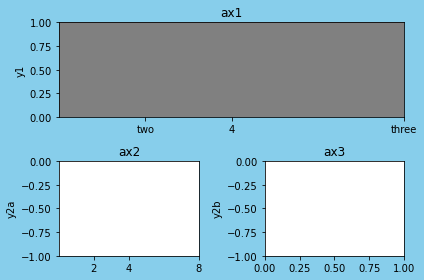

In [7]:
"""add_subplotの設定"""
fig = plt.figure(facecolor='skyblue', tight_layout=True)
ax1 = fig.add_subplot(211, title='ax1', fc='gray', ylabel='y1',
                      xticks=[2, 4, 8], xticklabels=['two', '4', 'three'])
ax2 = fig.add_subplot(223, title='ax2', xticks=[2, 4, 8], ylim=(-1, 0), ylabel='y2a')
ax3 = fig.add_subplot(224, title='ax3', sharey=ax2, ylabel='y2b')
plt.show()
plt.close()
# fig.savefig('2-1_b.png', facecolor=fig.get_facecolor())

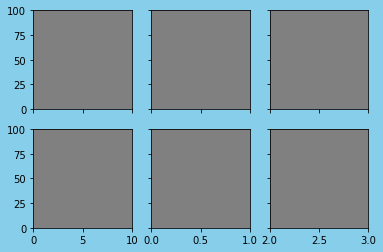

In [8]:
"""subplotの設定"""
fig, axes = plt.subplots(2, 3, facecolor='skyblue',
                         sharex='col', sharey=True,
                         subplot_kw=dict(facecolor='gray'))
axes[0, 0].set_xlim(0, 10)  #一番左上のグラフのx軸の範囲を0～10に設定
axes[1, 2].set_xlim(2, 3)  #一番右下のグラフのx軸の範囲を2～3に設定
axes[0, 1].set_ylim(0, 100)  #上段中央のグラフのy軸の範囲を0～100に設定
plt.show()
plt.close()

In [9]:
"""GridSpecの設定

グラフの大きさ(配置)をスライスで設定できる。

"""
fig = plt.figure(facecolor='skyblue', tight_layout=True)
gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, 0:2], title='ax1', facecolor='gray')
ax2 = fig.add_subplot(gs[1, 0:2], title='ax2', facecolor='lightgreen')
ax3 = fig.add_subplot(gs[:, 2], title='ax3')
# plt.show()
plt.close()

In [10]:
# プロット用データの作成
y1 = [np.random.randint(0, 10) for i in range(10)]
y2 = [np.random.randint(20, 30) for i in range(10)]

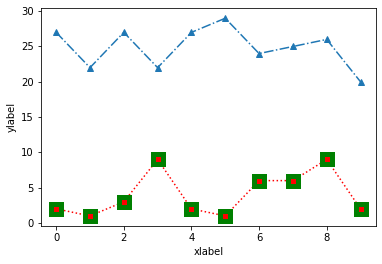

In [11]:
"""折れ線グラフ
[引数]
label           ：プロットのラベル。
color           ：折れ線の色。cでも可。
dashes          ：折れ線の実線部分と空白部分の長さをリストで指定。
linestyle       ：折れ線の線種。lsでも可。dashesが指定されていると無効。
linewidth       ：折れ線の太さ。lwでも可。
alpha           ：透明度を0～1で指定。
zorder          ：オブジェクトが重なっていた時この値が大きい方が前面に描画される。
marker          ：マーカーの形状。Noneでマーカーなし。
markersize      ：マーカーのサイズ。msでも可。
markerfacecolor ：マーカーの色。mfcでも可。
markeredgewidth ：マーカーの縁の太さ。mewでも可。
markeredgecolor ：マーカーの縁の色。mecでも可。
"""
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='xlabel', ylabel='ylabel')
ax.plot(y1, 'rs:', label='HR', ms=10, mew=5, mec='green')
ax.plot(y2, marker='^', linestyle='-.')
plt.show()
plt.close()